# Explore Audio Features

In [ ]:
# http://spotipy.readthedocs.io/en/latest/#api-reference
# https://beta.developer.spotify.com/documentation/web-api/reference

In [1]:
import json
import pandas as pd
import unicodedata
from pprint import pprint
import os.path
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Manage Authorization in Client Credentials mode
client_credentials_manager = SpotifyClientCredentials(client_id='9b23e599c83f45d9a93e6559d79b3f4a', \
                                                      client_secret='710a69f7a7984a6c9c71c1682c46d7b5', \
                                                      proxies=None)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Helper Functions

In [3]:
def remove_accents(string):
    """
    Removes the accents from the inout string
    @param string String to remove accents from
    @returns String without accents
    """
    return ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))

In [4]:
def search_artist(band_name):
    """
    Calls the Spotify API object and returns only one artist object
    @param band_name String with the band name
    @return Dictionary with the artist information
    """
    
    # list with band names whose name will be changed
    manual_name_changes = {
        'chk chk chk' : '!!!',
        'other' : 'another'
    };
    
    try:
        # remove accents and make lowercase
        band_name = remove_accents(band_name).lower()
        
        # call api
        results = sp.search(q=band_name, limit=20, type='artist')
        #print("{} => {} artists found".format(band_name, len(results)))
        
        # some manual changes
        if band_name in list(manual_name_changes.keys()):
            band_name = manual_name_changes[band_name]

        # return only one artist
        if results['artists']['total'] > 0:
            return [artist for artist in results['artists']['items'] if remove_accents(artist['name']).lower() == band_name][0]
        else:
            return []

    except:
        print('Error searching artist')
        return []

In [5]:
def get_albums_of_artist(artist_id):
    """
    Gets the albums of the artist passed as argument
    @param artist_id Id of the artist
    @return Array of dictionaries, each one with the information of one album
    """
    
    albums = []
    
    # call API
    results = sp.artist_albums(artist_id=artist['id'], album_type='album', limit=50)
    
    # store results in array
    albums.extend(results['items'])

    # get more albums while more results are available...
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])

    # skip duplicate albums (by album name)
    unique_albums = []
    unique_names = set()
    for album in albums:
        name = album['name'].lower()
        if not name in unique_names:  
            unique_albums.append(album)
            unique_names.add(name)
    
    return unique_albums

In [6]:
def get_tracks_of_album(album_id):
    """
    Gets the tracks of the album passed as argument
    @param album_id Id of the album
    @return Array of dictionaries, each one with the information of one track
    """
    
    tracks = []
    
    # call API
    results = sp.album_tracks(album_id=album_id, limit=50)
    
    # store results in array
    tracks.extend(results['items'])
    
    # get more tracks while more results are available...
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    return tracks

In [7]:
def get_audio_features_of_tracks(track_ids):
    """
    Gets the audio features of the tracks passed as argument
    @param track_ids List of track ids
    @return Array of dictionaries, each one with the information of one track
    """
        
    # call API
    features = sp.audio_features(tracks=track_ids)

    return features

## Testing functions

In [92]:
artist = search_artist('ARCAdé fiRë')
(artist['name'], artist['popularity'], artist['followers']['total'], len(artist['genres']))

arcade fire => 1 artists found


('Arcade Fire', 73, 1205487, 10)

In [95]:
albums = get_albums_of_artist(artist['id'])
album_ids = [album['id'] for album in albums]
[(album['name'], album['id']) for album in albums]

[('Everything Now', '1DNojVW079FU9YnAMk3Cgr'),
 ('Reflektor (Deluxe)', '6kDCHWavDS2bNbtojhRjfJ'),
 ('Reflektor', '3Y2bjF2Jwocc0USbu08Y2I'),
 ('The Suburbs', '4s3p6n6KW72PfbicWARHuY'),
 ('The Suburbs (Deluxe Edition)', '4zJBuQXo92Q7QhA5U4V8kw'),
 ('Neon Bible', '7rncXz7PjaXTxyUfIcLaMT'),
 ('Funeral', '0Lu28wC62eXM4kr8DfUIKc')]

In [101]:
tracks = get_tracks_of_album(album_ids[0])
track_ids = [track['id'] for track in tracks]
[(track['track_number'], track['name'], track['id']) for track in tracks]

[(1, 'Everything_Now (continued)', '2wXYAGCj2gA6biHi0W4xdJ'),
 (2, 'Everything Now', '7KsZHCfOitA5V9oQYVdltG'),
 (3, 'Signs of Life', '1g1RmSl6D0I6m6MEtDvxYn'),
 (4, 'Creature Comfort', '2voWPWlDfIthC6GUjaIQyV'),
 (5, 'Peter Pan', '0LOnyr7dtH8GQAVypvT98T'),
 (6, 'Chemistry', '7kIwVGX93RF6c8ZLKpeiNN'),
 (7, 'Infinite Content', '4bjPdsuv5zMINSxuaSm5QF'),
 (8, 'Infinite_Content', '3vxdRMOGm9bWFYTFOkhYpV'),
 (9, 'Electric Blue', '0KWcRXcnGoB0gWSu4mshF8'),
 (10, 'Good God Damn', '2ZssXuZfktUr4MMDzEWD2Z'),
 (11, 'Put Your Money on Me', '0SaEmR2rdtfsZawPjMYkWg'),
 (12, "We Don't Deserve Love", '0BP2o4rGe7nkQea1JOWMbl'),
 (13, 'Everything Now (continued)', '643ZDkyffqGWzkDTzSfMCM')]

In [107]:
tracks_features = get_audio_features_of_tracks(track_ids)
tracks_features[0]

{'acousticness': 0.0167,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2wXYAGCj2gA6biHi0W4xdJ',
 'danceability': 0.331,
 'duration_ms': 46227,
 'energy': 0.493,
 'id': '2wXYAGCj2gA6biHi0W4xdJ',
 'instrumentalness': 0.00157,
 'key': 5,
 'liveness': 0.589,
 'loudness': -7.814,
 'mode': 1,
 'speechiness': 0.0394,
 'tempo': 74.341,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/2wXYAGCj2gA6biHi0W4xdJ',
 'type': 'audio_features',
 'uri': 'spotify:track:2wXYAGCj2gA6biHi0W4xdJ',
 'valence': 0.19}

## Get audio features of all tracks of all albums of an artist

In [162]:
# read from file if already downloaded
tracks_full_info = []
artists_read = []
if os.path.isfile('tracks_full_info.json'):
    json_data=open('tracks_full_info.json').read()
    tracks_full_info = json.loads(json_data)
    artists_read = set([remove_accents(a['artist_name'].lower()) for a in tracks_full_info])
    print("{} artists read - {} tracks read".format(len(artists_read),len(tracks_full_info)))

7 artists read - 697 tracks read


In [163]:
artists_to_search = ['Shakira']

In [164]:
# get audio features of all tracks of all albums of all artists
for ats in artists_to_search:
    
    # if the artist is already in the tracks info, skip it
    if(remove_accents(ats.lower()) in artists_read):
        continue
    
    # get artist
    artist = search_artist(ats)
    print(artist['name'])
    
    # get albums
    albums = get_albums_of_artist(artist['id'])
    
    # get tracks and audio features of tracks
    for album in albums:

        print('  ',album['name'])
        
        # get tracks info
        tracks = get_tracks_of_album(album['id'])
        track_ids = [track['id'] for track in tracks]
                
        # get tracks audio features
        tracks_features = get_audio_features_of_tracks(track_ids)
        
        # compile track, album and artist information
        for track in tracks_features:
            
            # look for corresponding track    
            track_info = next((t for t in tracks if t['id'] == track['id']), None)

            #print('    ',track_info['name'])
            
            # add track info to json with features
            track['duration_ms']  = track_info['duration_ms'];
            track['explicit']     = track_info['explicit'];
            track['name']         = track_info['name'];
            track['track_number'] = track_info['track_number'];

            # add album info to json with features
            track['album_id']           = album['id'];
            track['album_name']         = album['name'];
            track['album_release_date'] = album['release_date'];

            # add album info to json with features
            track['artist_id']         = artist['id'];
            track['artist_name']       = artist['name'];
            track['artist_followers']  = artist['followers']['total'];
            track['artist_popularity'] = artist['popularity'];

            tracks_full_info.append(track)

Shakira
   El Dorado
   Shakira. (Deluxe Version)
   Shakira.
   Shakira. (Track Commentary)
   Live From Paris
   Sale el Sol
   Loba
   She Wolf (Deluxe Version)
   Oral Fixation Vol. 2
   Fijación Oral Volumen 1
   Fijacion Oral
   Live & Off The Record
   Laundry Service
   Laundry Service (Alben für die Ewigkeit)
   Shakira MTV Unplugged
   Donde Estan Los Ladrones
   Pies Descalzos
   Grandes Exitos
   The Remixes


In [165]:
# persist tracks downloaded
with open('tracks_full_info.json', 'w') as fp:
    json.dump(tracks_full_info, fp)

In [166]:
# Create pandas dataframe
tracks = pd.DataFrame.from_dict(tracks_full_info).drop(['analysis_url', 'album_id', 'artist_id', 'track_href', 'uri', 'type', 'id'], 1)

In [167]:
# reorder columns
tracks = tracks[['artist_name', 'artist_popularity','artist_followers',\
        'album_name', 'album_release_date',\
        'name','track_number',\
        'explicit','duration_ms','acousticness', 'danceability', 'energy', 'instrumentalness', 'key', \
        'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]

## Exploratory analysis: compare two artists plotting histograms of each feature

/home/eduard/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


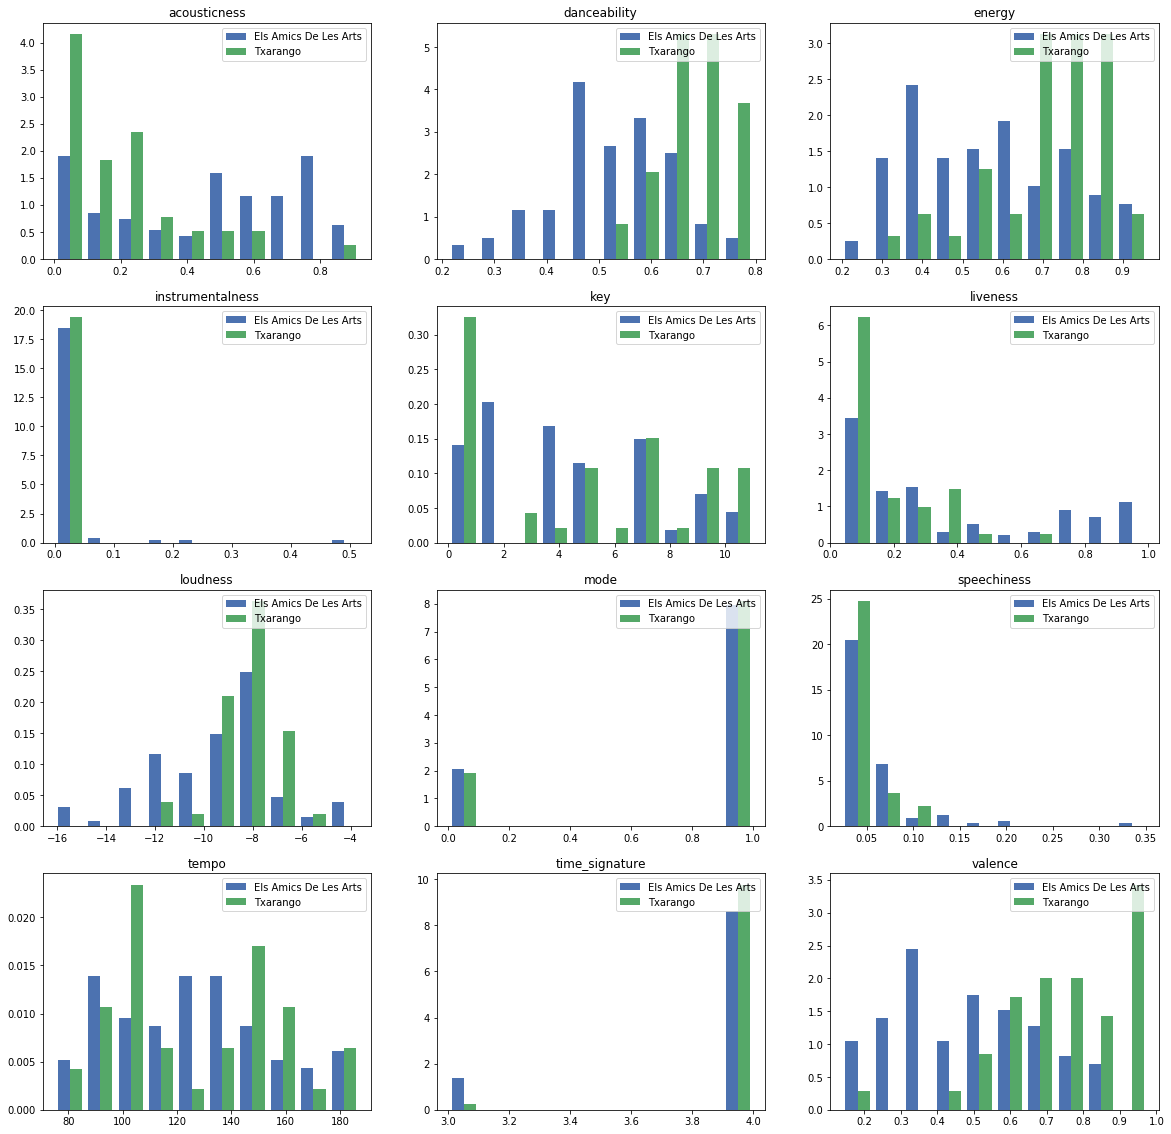

In [153]:
artists_to_compare = ['Els Amics De Les Arts','Txarango']

features = ['acousticness','danceability','energy','instrumentalness','key','liveness',\
            'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

tracks_A = tracks[tracks['artist_name'] == artists_to_compare[0]]
tracks_B = tracks[tracks['artist_name'] == artists_to_compare[1]]

# plot with matplotlib
f, ax = plt.subplots(4,3)
f.set_figheight(20)
f.set_figwidth(20)
i=0; j=0; # init at top-left subplot
for f in features:
    ax[i,j].hist([tracks_A[f], tracks_B[f]], bins=10, density=True, label=[artists_to_compare[0], artists_to_compare[1]])
    ax[i,j].set_title(f)
    ax[i,j].legend(loc='upper right')
    j=j+1; # next col subplot
    if(j==3):
        # if last col subplot
        j=0; # first col subplot
        i=i+1; # next row subplot

## Using Kernel Density Estimation instead of raw histograms

https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28

https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

In [168]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np

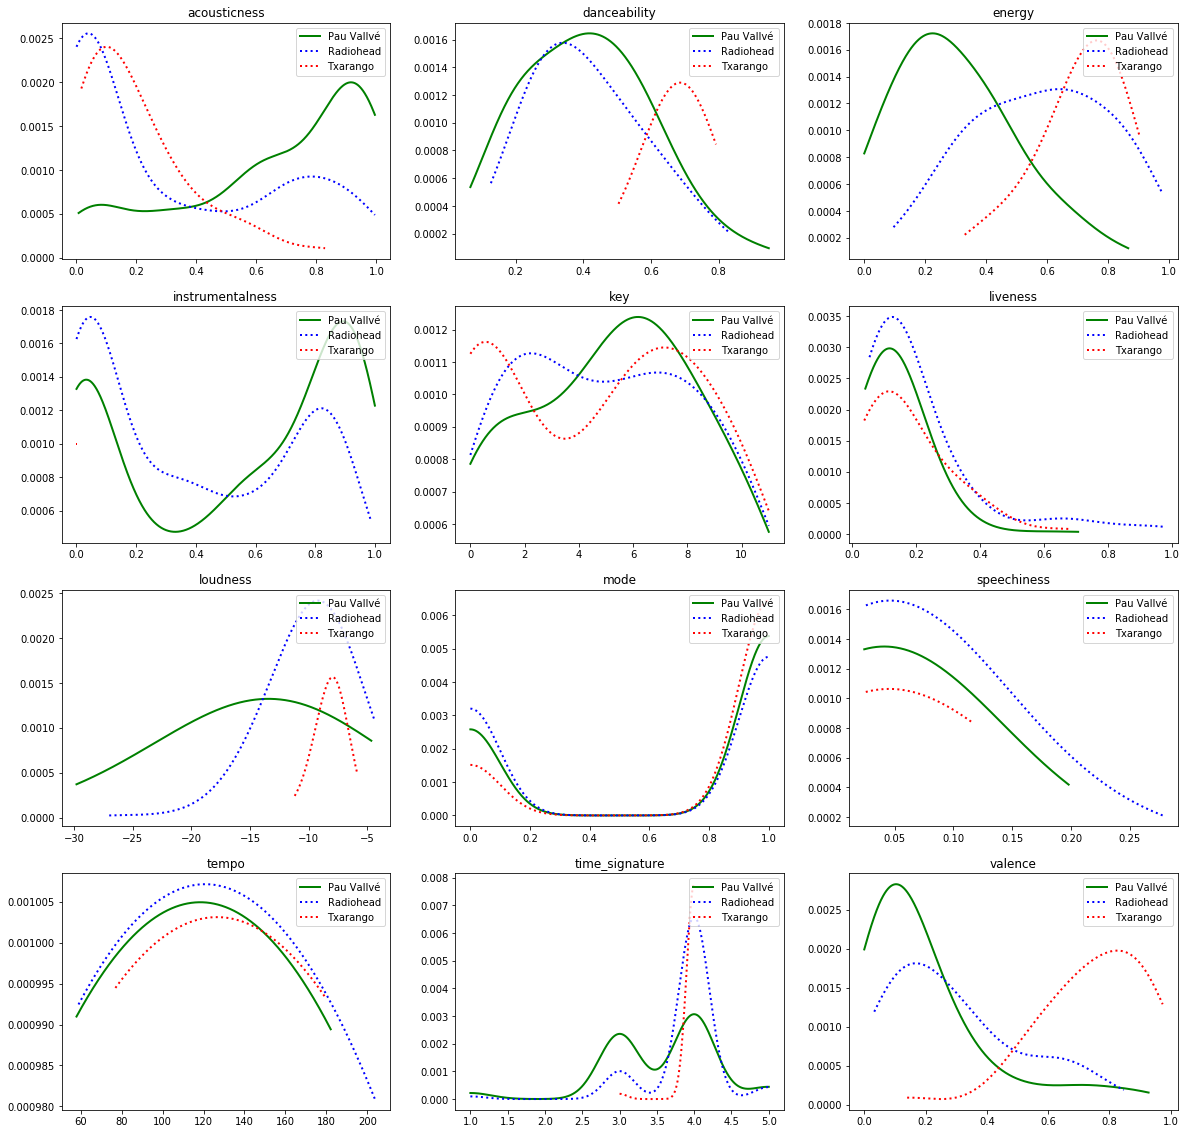

In [177]:
artists_to_compare = [\
    {'name': 'Pau Vallvé', 'color' : 'green', 'linewidth' : 2, 'linestyle' : '-'},
    {'name': 'Radiohead', 'color' : 'blue', 'linewidth' : 2, 'linestyle' : ':'},
    {'name': 'Txarango', 'color' : 'red', 'linewidth' : 2, 'linestyle' : ':'}
]

features = ['acousticness','danceability','energy','instrumentalness','key','liveness',\
            'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence'];

# plot with matplotlib
fig, ax = plt.subplots(4,3)
fig.set_figheight(20)
fig.set_figwidth(20)
i=0; j=0; # init at top-left subplot

for f in features:
        
    for a in artists_to_compare:
                
        # filter tracks by artist
        t_a = tracks[tracks['artist_name'] == a['name']]

        # create arrays with data
        x = np.array(t_a[f])[:,np.newaxis];
        x_plot = np.linspace(x.min(), x.max(), 1000)[:, np.newaxis];

        # create kde model and fit with x data
        bandwidth = np.abs((0.1*x.mean()*x.std()));
        bandwidth = 0.1 if bandwidth<0.1 else bandwidth;
        kde_fit = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(x)

        # score_samples() returns the log-likelihood of the samples
        log_pdf = kde_fit.score_samples(x_plot)
        kde = np.exp(log_pdf)
        
        # normalize kde area = 1
        kde = kde/sum(kde)

        # plot
        ax[i,j].plot(x_plot, kde, 
                     color=a['color'], 
                     linewidth=a['linewidth'], 
                     linestyle=a['linestyle'], 
                     label=a['name'])
        ax[i,j].set_title(f)
        ax[i,j].legend(loc='upper right')
    
    # jump to next subplot
    j=j+1; # next col subplot
    if(j==3):
        # if last col subplot
        j=0; # first col subplot
        i=i+1; # next row subplot

# store plot to file
filename = 'plots/'+' - '.join([remove_accents(a['name'].lower()) for a in artists_to_compare]) + '.png'
fig.savefig(filename, dpi=fig.dpi)

## Aggregate audio features by band